### 2021_11_01_5

### 비지도학습
* 비지도변환 : PCA, SVD, NMF, tSNE
* 군집 : K-means, K-medoid, DBSCAN

### t-SNE를 이용한 매니폴드(manifold learning)
* (가) t-Distributed Stochastic Neighbor Embedding의 약자
* (나) 매니폴드 학습(manifol learning) 알고리즘은 이 시각화 알고리즘은 시각화가 목적으로 3개 이상의 특성을 뽑는 경우가 없다.
* (다) 이 알고리즘은 훈련 데이터를 새로운 표현(시각화)으로 변환시키지만, 새로운 데이터에는 적용하지 못한다.
* (라) 매니폴드(manifold) 학습은 탐색적 데이터 탐색에 유용하지만 지도학습용으로 거의 사용 안한다.
* (마) 매니폴드 학습 알고리즘은 주성분 분석(PCA)의 비선형 버전으로 볼 수 있다.
* (사) 데이터 포인트 사이의 거리를 잘 보존하는 2차원 표현 찾기
* (아) 테스트 세트에는 적용할 수 없고, 단지 훈련 데이터에만 변환 가능.

### PCA 기반 차원 감소의 문제점
* (가) 차원을 감소하면서 중복되는 현상으로 인해 다른 class의 내용을 확인이 어려움
* (나) 2차원에서 1차원으로 차원을 줄여, 2차원에서 구별되는 것이 1차원상의 위치가 유사해 두 군집의 변별력이 없어졌다.

### t-SNE(티스니)
#### 목적 : 고차원의 공간의 점 집합에서 저차원의 공간(일반적으로 2차원) 평면에서 점의 충실한 표현 찾기
* (1) 원본 데이터를 2차원 공간에 랜덤한 위치에 놓는다.
* (2) 임의로 하나의 데이터 포인터를 선정하고, 그리고 t분포 그래프에서 임의로 선정한 데이퍼 포인트를 기준점으로 하여 다른 데이터 포인트와의 거리에 있는 t분포값을 선택.
* 이 t-분포값을 친밀도(Similarity)라 한다. 친밀도가 가까운 값을 묶는다.
* (2) 원본 특성 공간에서 가까운 포인트는 가깝게, 멀리 떨어진 포인트는 멀어지게 한다.
* (3) t-SNE는 멀리 떨어진 포인트와 거리 보존보다 가까이 있는 포인트에 더 많은 비중을 둔다.

### 장단점
* 장점 : PCA와는 달리 군집이 중복되지 않는다. 약간 조정해야 하지만 기본값으로 잘 동작한다. 데이터의 군집성과 같은 특성들이 유지되기 때문에 시각화를 통한 데이터 분석에 유용하다.
* 단점 : 임의의 데이터 포인트를 선정한다. 매번 계산할 때마다 축의 위치가 바뀌어서 다른 모양으로 나타난다. 머신러닝 모델의 학습 피쳐로 사용하는 것의 어려움이 있다.

### scikit-learn에 있는 손글씨 숫자 데이터셋에 t-SNE 매니폴드 학습 적용

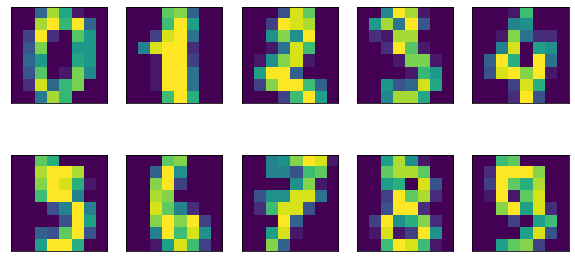

In [2]:
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5),
                        subplot_kw = {'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [3]:
print(digits.data.shape)    # 1797행, 64열(8*8) - 1797개 8x8 픽셀정보
print(digits.data[1:5])
print(digits.DESCR)
print(digits.images[1:5])
print(digits.images.shape)
print(digits.target[1:15])
print(digits.target.shape)
print(digits.target_names)

(1797, 64)
[[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
   9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
 [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
   1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
   0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1. 

### PCA를 이용한 2차원으로 축소
* 처음 두 개의 주성분을 이용해 그래프를 그리고, 각 샘플에 해당하는 클래스의 숫자를 표시

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

Text(0, 0.5, '두 번째 주성분')

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  

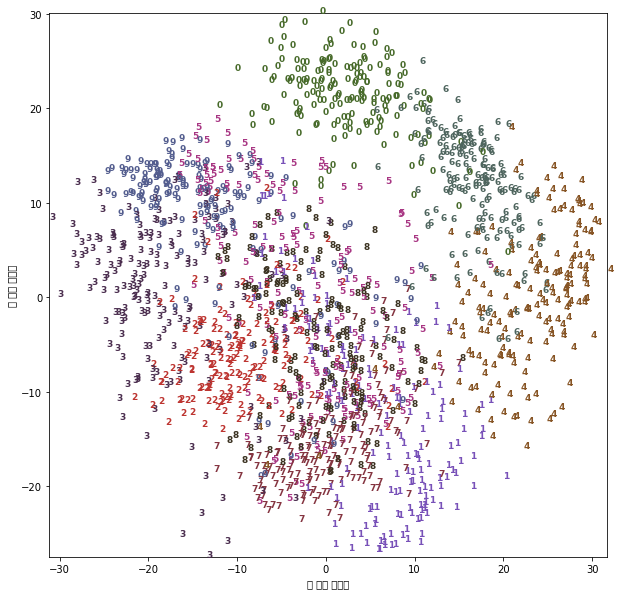

In [5]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))

# 두개의 주성분의 값의 범위를 x축, y축 지정.
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())


for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

* 숫자 0, 6, 4는 두 개의 주성분만으로 잘 분리된 것 같다. 
* 하지만 중첩된 것이 있고, 다른 숫자들은 대부분 많이 겹쳐 있다.

### 같은 데이터셋을 t-SNE 를 적용해 보기

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# TSNE에는 transform 메서드가 없다. 
# 새 데이터변환 기능 제공안함.
# 대신 fit_transform 사용.
d_tsne = tsne.fit_transform(digits.data)
print("기존 데이터 형태 :" , digits.data.shape)
print("tsne로 표현한 데이터 형태 :" ,d_tsne.shape)

기존 데이터 형태 : (1797, 64)
tsne로 표현한 데이터 형태 : (1797, 2)


In [9]:
print(d_tsne[:,0].shape)
print(d_tsne[:,0].min(), d_tsne[:,0].max())   # 성분1의 최소 최대값
print(d_tsne[:,1].min(), d_tsne[:,1].max())   # 성분2의 최소 최대값

(1797,)
-58.81919 74.35962
-67.43645 64.40403


Text(0.5, 0, 't-SNE 특성 1')

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


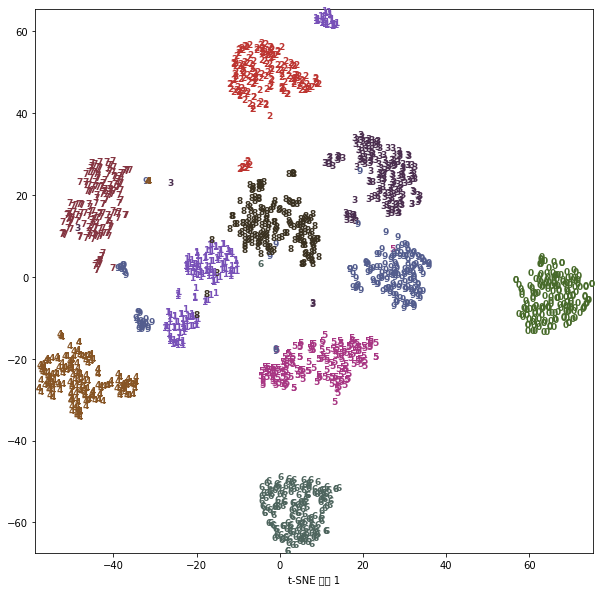

In [10]:
plt.figure(figsize=(10,10)) # 그래프 사이즈 지정.
plt.xlim(d_tsne[:,0].min(), d_tsne[:,0].max() + 1)
plt.ylim(d_tsne[:,1].min(), d_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(d_tsne[i,0], 
             d_tsne[i,1],
             str(digits.target[i]),
             color =  colors[digits.target[i]],
             fontdict={'weight':'bold', 'size':9})
plt.xlabel("t-SNE 특성 0")
plt.xlabel("t-SNE 특성 1")

* (가) t-SNE 모든 클래스가 확실히 잘 구분되었다.
* (나) 1과 9는 조금 나뉘었지만 대부분의 숫자는 하나의 그룹으로 모여 있다.
* (다) 이 알고리즘은 클래스 레이블 정보를 사용하지 않으므로 완전 비지도 학습
    * --> 원본 데이터 공간에서 포인트들이 얼마나 가까이 있는지에 대한 정보로
    * --> 잘 구분되는 2차원 표현을 찾는다.

### 추가학습 URL
[링크1](https://distill.pub/2016/misread-tsne/) [링크2](https://www.slideshare.net/ssuser06e0c5/visualizing-data-using-tsne-73621033) [링크2](http://kolikim.tistory.com/29)